In [31]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
df=pd.read_csv('Nigeria Covid update.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 69 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  1273 non-null   int64  
 1   iso_code                                    1273 non-null   object 
 2   continent                                   1273 non-null   object 
 3   location                                    1273 non-null   object 
 4   date                                        1273 non-null   object 
 5   population                                  1273 non-null   int64  
 6   new_cases                                   1273 non-null   float64
 7   new_cases_smoothed                          1268 non-null   float64
 8   total_deaths                                1193 non-null   float64
 9   new_deaths                                  1273 non-null   float64
 10  new_deaths_s

In [168]:
table=df[df['new_cases']>0].copy()

In [169]:
table=table.loc[:,['date',	'population',	'new_cases',	'new_cases_smoothed',	'total_deaths',	'new_deaths',	'new_deaths_smoothed','months']]

In [182]:
table

,date,population,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,months
57,2020-02-29,218541216,1.0,0.143,NaN,0.0,0.0,Feb
67,2020-03-10,218541216,1.0,0.143,NaN,0.0,0.0,Mar
76,2020-03-19,218541216,1.0,0.143,NaN,0.0,0.0,Mar
77,2020-03-20,218541216,6.0,1.000,NaN,0.0,0.0,Mar
78,2020-03-21,218541216,4.0,1.571,NaN,0.0,0.0,Mar
...,...,...,...,...,...,...,...,...
1163,2023-03-11,218541216,13.0,1.857,3155.0,0.0,0.0,Mar
1170,2023-03-18,218541216,11.0,1.571,3155.0,0.0,0.0,Mar
1177,2023-03-25,218541216,8.0,1.143,3155.0,0.0,0.0,Mar
1184,2023-04-01,218541216,5.0,0.714,3155.0,0.0,0.0,Apr


In [170]:
total=table.groupby('months')[['new_cases','new_cases_smoothed']].sum().reset_index()
total

,months,new_cases,new_cases_smoothed
0,Apr,4201.0,3736.572
1,Aug,32119.0,31497.856
2,Dec,46701.0,41588.427
3,Feb,26498.0,29322.286
4,Jan,55504.0,55936.715
5,Jul,27111.0,23501.427
6,Jun,17717.0,16157.711
7,Mar,8432.0,9288.144
8,May,9750.0,8931.855
9,Nov,7122.0,7279.428


In [101]:
#trend=total.pivot_table(index=None,columns='months',values='new_cases')
#trend


In [171]:
month_order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [172]:
orderedMonth=total.set_index('months').reindex(month_order).reset_index()
orderedMonth

,months,new_cases,new_cases_smoothed
0,Jan,55504.0,55936.715
1,Feb,26498.0,29322.286
2,Mar,8432.0,9288.144
3,Apr,4201.0,3736.572
4,May,9750.0,8931.855
5,Jun,17717.0,16157.711
6,Jul,27111.0,23501.427
7,Aug,32119.0,31497.856
8,Sep,20317.0,20039.860
9,Oct,11203.0,11041.285


#######--------------------#######

__NEW CASES SMOOTHED IN NIGERIA__

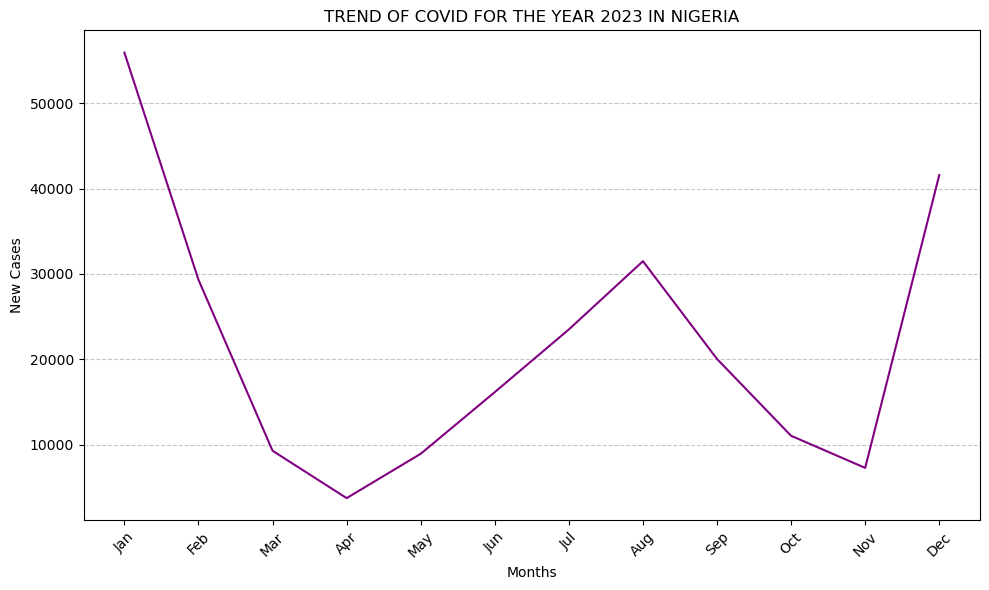

In [154]:
#Plotting
plt.figure(figsize=(10,6))
#plt.plot(orderedMonth['months'],orderedMonth['new_cases'],color='skyblue',marker='o',linestyle='-',linewidth=2)
plt.plot(orderedMonth['months'],orderedMonth['new_cases_smoothed'],color='purple')
plt.xticks(rotation=45)
plt.title('TREND OF COVID FOR THE YEAR 2023 IN NIGERIA')
plt.xlabel('Months')
plt.ylabel('New Cases')
plt.tight_layout()
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()


__#######################################__

__NEW CASES PER MONTH__

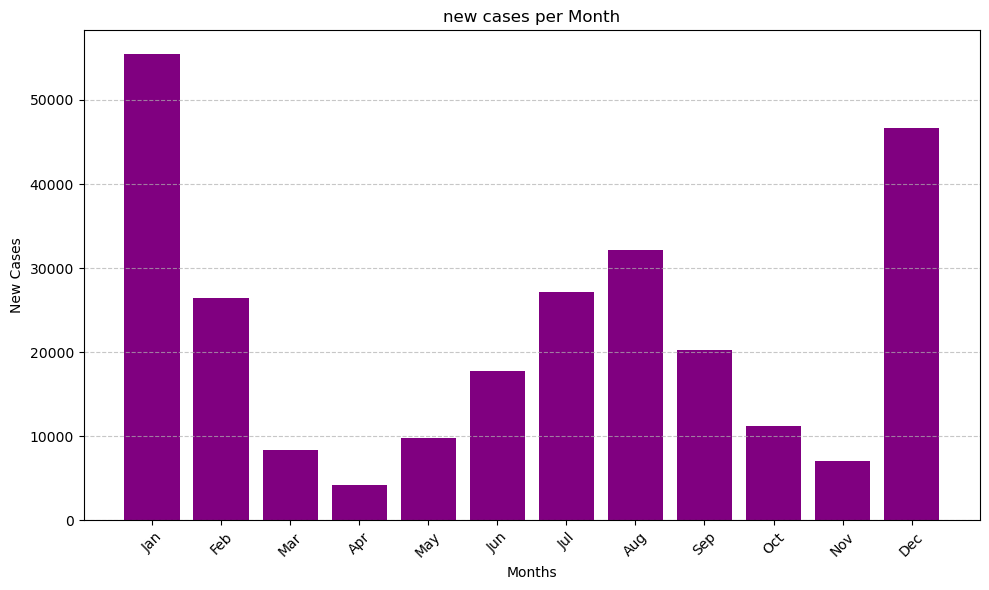

In [173]:
plt.figure(figsize=(10,6))
#plt.plot(orderedMonth['months'],orderedMonth['new_cases'],color='skyblue',marker='o',linestyle='-',linewidth=2)
plt.bar(orderedMonth['months'],orderedMonth['new_cases'],color='purple')
plt.xticks(rotation=45)
plt.title('new cases per Month')
plt.xlabel('Months')
plt.ylabel('New Cases')
plt.tight_layout()
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

In [174]:
DeathTolls=table.groupby('months')[['total_deaths','new_deaths','new_deaths_smoothed']].sum().reset_index()

In [175]:
orderMonth=DeathTolls.set_index('months').reindex(month_order).reset_index()

In [176]:
DeathTolls=orderMonth

In [177]:
DeathTolls.sort_values(by='total_deaths',ascending=False).reset_index()


,index,months,total_deaths,new_deaths,new_deaths_smoothed
0,8,Sep,151704.0,352.0,433.143
1,11,Dec,145994.0,159.0,131.577
2,9,Oct,140777.0,226.0,228.575
3,0,Jan,136802.0,405.0,392.142
4,10,Nov,135813.0,110.0,124.719
5,2,Mar,135509.0,155.0,165.000
6,7,Aug,133881.0,442.0,359.572
7,1,Feb,127478.0,334.0,348.719
8,6,Jul,117490.0,337.0,328.143
9,4,May,107032.0,228.0,218.003


########--------#########

__DEATH OVER TIME__

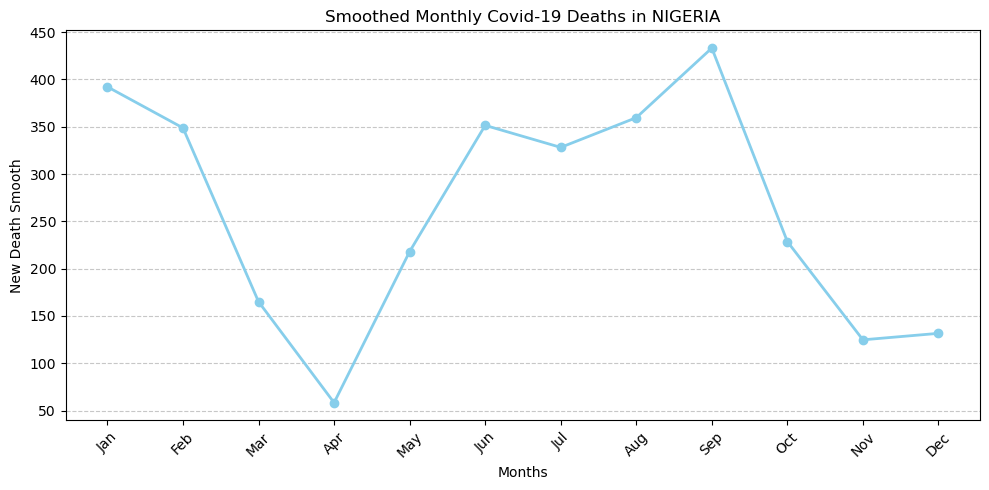

In [178]:
plt.figure(figsize=(10,5))
plt.plot(DeathTolls['months'],DeathTolls['new_deaths_smoothed'],color='skyblue',marker='o',linestyle='-',linewidth=2)
plt.title('Smoothed Monthly Covid-19 Deaths in NIGERIA')
plt.xticks(rotation=45)
plt.xlabel('Months')
plt.ylabel('New Death Smooth')
plt.tight_layout()
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

##########-----------------------#########

__DEATHS PER MONTHS__

Text(0.5, 20.40501897884898, 'Months')

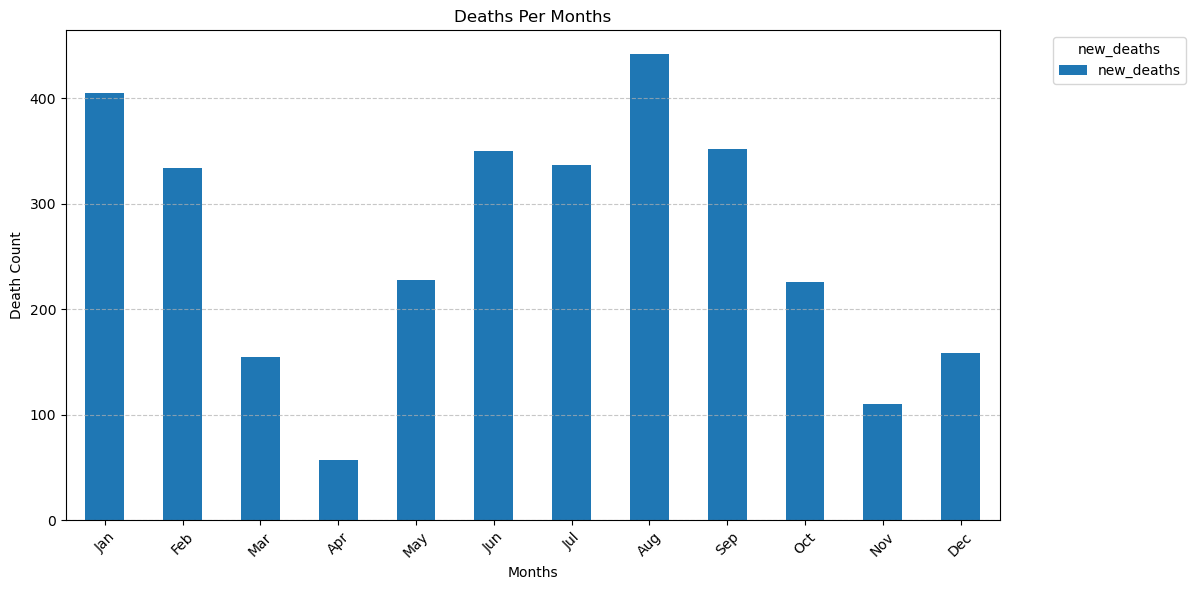

In [179]:
DeathTolls.plot(x='months',y='new_deaths',kind='bar',figsize=(10,6),title='Deaths Per Months')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.legend(title='new_deaths',bbox_to_anchor=(1.05,1),loc='upper left')
plt.ylabel('Death Count')
plt.xlabel('Months')

##########-----------------############

__DEATHS INCREASING OVERTIME__

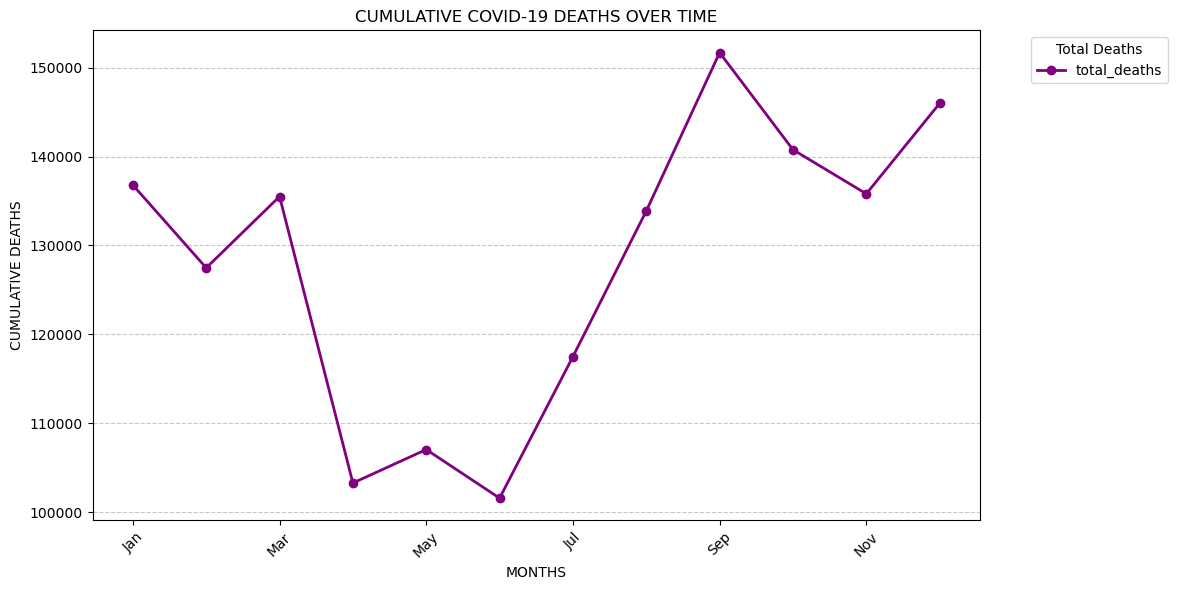

In [180]:
DeathTolls.plot(x='months',y='total_deaths',title='CUMULATIVE COVID-19 DEATHS OVER TIME',
                figsize=(10,6), color='purple',
                marker='o', linestyle='-',
                linewidth=2
)
plt.xticks(rotation=45)
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.xlabel('MONTHS')
plt.ylabel('CUMULATIVE DEATHS')
plt.tight_layout()
plt.legend(title='Total Deaths',bbox_to_anchor=(1.05,1),loc='upper left')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

In [181]:
table

,date,population,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,months
57,2020-02-29,218541216,1.0,0.143,NaN,0.0,0.0,Feb
67,2020-03-10,218541216,1.0,0.143,NaN,0.0,0.0,Mar
76,2020-03-19,218541216,1.0,0.143,NaN,0.0,0.0,Mar
77,2020-03-20,218541216,6.0,1.000,NaN,0.0,0.0,Mar
78,2020-03-21,218541216,4.0,1.571,NaN,0.0,0.0,Mar
...,...,...,...,...,...,...,...,...
1163,2023-03-11,218541216,13.0,1.857,3155.0,0.0,0.0,Mar
1170,2023-03-18,218541216,11.0,1.571,3155.0,0.0,0.0,Mar
1177,2023-03-25,218541216,8.0,1.143,3155.0,0.0,0.0,Mar
1184,2023-04-01,218541216,5.0,0.714,3155.0,0.0,0.0,Apr
